In [2]:
%matplotlib inline
documents = ["Application of combined porous tantalum scaffolds loaded with bone morphogenetic protein 7 to repair of osteochondral defect in rabbits. ",
            "Establishing the relationship between loading parameters and bone adaptation. ",
            "Importance of a moderate plate-to-bone distance for the functioning of the far cortical locking system. ",
            "Biological and osseointegration capabilities of hierarchically (meso-/micro-/nano-scale) roughened zirconia. ",
            "Femoral neck stress in older adults during stair ascent and descent.",
            "The mathematical simulation and study of the electrical resistance of the friction zone of the hip joint endoprosthesis with a metal-metal friction pair.",
            "Joint center estimation using single-frame optimization: part 1: numerical simulation.  ",
            "The peripheral soft tissues should not be ignored in the finite element models of the human knee joint. ",
             "bone",
            "Multidic: an open-source toolbox for multi-view 3d digital image correlation."]

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [4]:
#https://pythonprogramminglanguage.com/kmeans-text-clustering/
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=10, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :2]:
        print(' %s' % terms[ind]),
    print

    
print("\n")
print("Prediction")

Y = vectorizer.transform(["bone "])
prediction = model.predict(Y)
print(prediction)


Y = vectorizer.transform(["simulation"])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:
 bone
 adaptation
Cluster 1:
 joint
 simulation


Prediction
[0]
[1]


In [5]:
#http://jonathansoma.com/lede/algorithms-2017/classes/clustering/k-means-clustering-with-scikit-learn/
import pandas as pd
from textblob import TextBlob
from mpl_toolkits.mplot3d import Axes3D
def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                    stop_words = 'english',
                    use_idf = True,
                    max_features=3)
matrix = vec.fit_transform(documents)
df = pd.DataFrame(matrix.toarray(), columns = vec.get_feature_names())
print(df.head(2))

#cluster
km = KMeans(n_clusters = 4)
km.fit(df)

#assign the category to df
df['category'] = km.labels_

#build cmap
colormap = {0: 'red', 1: 'green', 2: 'blue', 3: 'orange'}
colors = df.apply(lambda row: colormap[row.category],axis = 1)


def draw(ax, df):
    colormap = { 0: 'red', 1: 'green', 2: 'blue', 3: 'orange' }
    colors = df.apply(lambda row: colormap[row.category], axis=1)

    ax.scatter(df['friction'], df['joint'], df['load'], c=colors, s=100, alpha=0.5)
    ax.set_xlabel('friction')
    ax.set_ylabel('joint')
    ax.set_zlabel('load')

chart_count_vert = 5
chart_count_horiz = 5
number_of_graphs = chart_count_vert * chart_count_horiz

fig = plt.figure(figsize=(3 * chart_count_horiz, 3 * chart_count_vert))

for i in range(number_of_graphs):
    ax = fig.add_subplot(chart_count_horiz, chart_count_vert, i + 1, projection='3d', azim=(-360 / number_of_graphs) * i)
    draw(ax, df)

ModuleNotFoundError: No module named 'textblob'

In [6]:
#training list of titles and keywords (bone* AND muscle* )
list1 = ["Bone fracture healing",
         "Chondrogenic growth factors",
         "Dynamic loading",
         "Mesenchymal stem cells",
         "Osteogenic growth factors",
         "Biomechanics",
        " Cruciate",
        "Knee",
        "Laxity",
        "Measurement",
        "Rotatometer",
        "graft-to-bone healing",
        "ligament reconstruction",
        "rabbit model",
        "Trabecular microstructure",
        ]
#test list
list2 = [""]
         
vectorizer = TfidfVectorizer(stop_words = 'english',                    
                             use_idf = True,
                            max_features =2)

vec = vectorizer.fit(list1) #train vec using list1
vectorized = vec.transform(list1) #transform list1 using vec
km = KMeans(n_clusters = 2,
           init = 'k-means++',
           n_init = 1,
           max_iter= 100,
           precompute_distances = True,
           random_state = None,
           n_jobs =1)
matrix = vec.fit_transform(list1)
df = pd.DataFrame(matrix.toarray(), columns = vec.get_feature_names())
print(df)

km.fit(vectorized)
list2Vec = vec.transform(list2) #transform list2 using vec
km.predict(list2Vec)


    bone  factors
0    1.0      0.0
1    0.0      1.0
2    0.0      0.0
3    0.0      0.0
4    0.0      1.0
5    0.0      0.0
6    0.0      0.0
7    0.0      0.0
8    0.0      0.0
9    0.0      0.0
10   0.0      0.0
11   1.0      0.0
12   0.0      0.0
13   0.0      0.0
14   0.0      0.0


array([0], dtype=int32)

In [6]:
#https://towardsdatascience.com/a-production-ready-multi-class-text-classifier-96490408757

import pandas as pd
import numpy as np
#load data
df = pd.read_csv("/Users/ryanalcantara/Google Drive/Subreddit/biomch_l_list.csv")

df.sample(5)

from collections import Counter
Counter(df["topic"])

#preprocessing
import re
def clean_str(string):
    """
    Tokenization/string cleaning for dataset
    Every dataset is lower cased except
    """
    string = re.sub(r"\n", "", string)    
    string = re.sub(r"\r", "", string) 
    string = re.sub(r"[0-9]", "digit", string)
    string = re.sub(r"\'", "", string)    
    string = re.sub(r"\"", "", string)    
    return string.strip().lower()
X = []
for i in range(df.shape[0]):
    X.append(clean_str(df.iloc[i][1]))
y = np.array(df["topic"])

#train on 70% of data, test on 30%
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=5)

#pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

model = Pipeline([("vectorizer", CountVectorizer()),
 ("tfidf", TfidfTransformer()),
 ("clf", OneVsRestClassifier(LinearSVC(class_weight= "balanced")))])
#the class_weight="balanced" option tries to remove the biasedness of model towards majority sample

#paramater selection
from sklearn.grid_search import GridSearchCV
parameters = {'vectorizer__ngram_range': [(1, 1), (1, 2),(2,2)],
               'tfidf__use_idf': (True, False)}
gs_clf_svm = GridSearchCV(model, parameters, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(X, y)
print(gs_clf_svm.best_score_)
print(gs_clf_svm.best_params_)

#preparing the final pipeline using the selected parameters
model = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', OneVsRestClassifier(LinearSVC(class_weight="balanced")))])

#fit model with training data
model.fit(X_train, y_train)
#evaluation on test data
pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(pred, y_test)

FileNotFoundError: File b'/Users/ryanalcantara/Google Drive/Subreddit/biomch_l_list.csv' does not exist

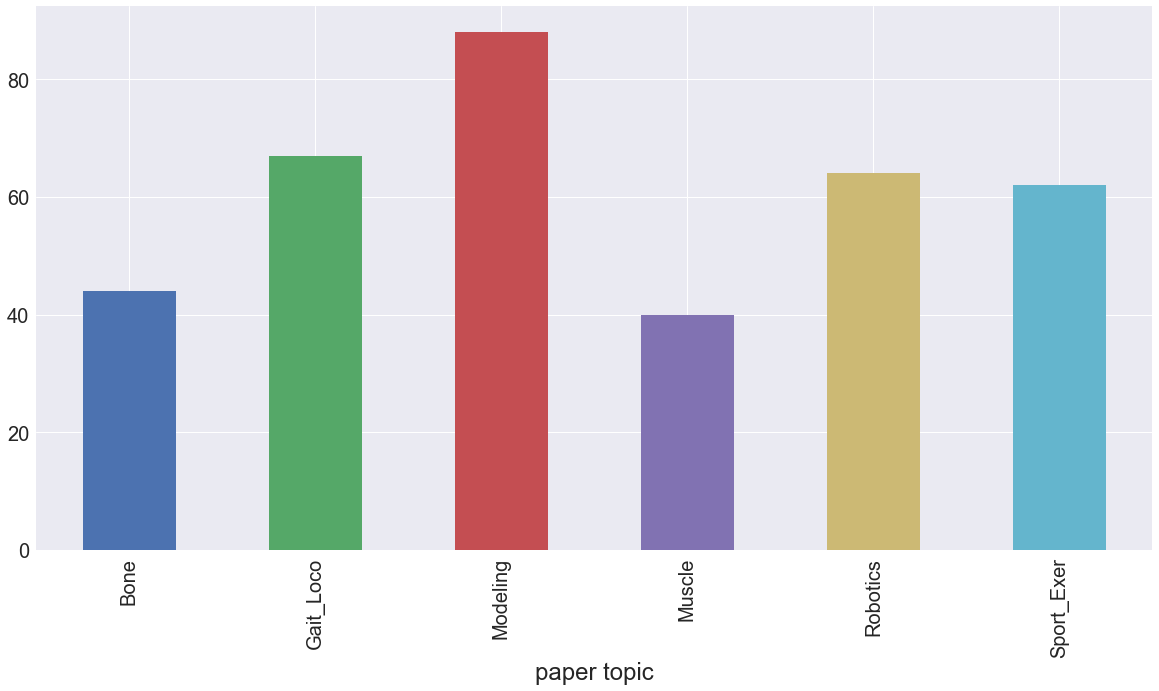

In [10]:
#https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f
%matplotlib inline
import pandas as pd
from io import StringIO
#mac
#df = pd.read_csv("/Users/ryanalcantara/Google Drive/Subreddit/biomch_l_list.csv")
#pc
df = pd.read_csv(r"C:\Users\ryans\Google Drive\Subreddit\biomch_l_list.csv")
df.sample(5)

col = ['topic','title']
df = df[col]
df = df[pd.notnull(df['title'])]

df.columns = ['topic','title']

df['topic_id'] = df['topic'].factorize()[0]
topic_id_df = df[['topic',
                  'topic_id']].drop_duplicates().sort_values('topic_id')
topic_to_id = dict(topic_id_df.values)
id_to_topic = dict(topic_id_df[['topic_id','topic']].values)
df.sample(5)

#histo of topics (ideally have >600 each)
import matplotlib.pyplot as plt
plt.rc('xtick',labelsize = 20)
plt.rc('ytick',labelsize = 20)
fig = plt.figure(figsize= (20,10))
df.groupby('topic').title.count().plot.bar(ylim=0)
plt.xlabel("paper topic",fontsize = 24)
plt.show()


In [11]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf = True,
                       min_df = 1,
                       norm = 'l2',
                       encoding = 'latin-1',
                       ngram_range = (1,2),
                       stop_words = 'english')

features = tfidf.fit_transform(df.title).toarray()
labels = df.topic_id
print(features.shape) #(a,b) a num of titles is represented by b num of features

from sklearn.feature_selection import chi2
import numpy as np

N = 2
for topic, topic_id in sorted(topic_to_id.items()):
    features_chi2 = chi2(features, labels == topic_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(topic))
    print(". Most correlated unigrams:\n . {}".format('\n . '.join(unigrams[-N:])))
    print(". Most correlated bigrams:\n . {}".format('\n . '.join(bigrams[-N:])))
    print("")

(365, 4943)
# 'Bone':
. Most correlated unigrams:
 . fracture
 . bone
. Most correlated bigrams:
 . healing rats
 . fracture healing

# 'Gait_Loco':
. Most correlated unigrams:
 . patients
 . gait
. Most correlated bigrams:
 . knee osteoarthritis
 . parkinson disease

# 'Modeling':
. Most correlated unigrams:
 . finite
 . modeling
. Most correlated bigrams:
 . patient specific
 . finite element

# 'Muscle':
. Most correlated unigrams:
 . muscles
 . muscle
. Most correlated bigrams:
 . muscle force
 . skeletal muscle

# 'Robotics':
. Most correlated unigrams:
 . robots
 . robot
. Most correlated bigrams:
 . hexapod robot
 . biped robot

# 'Sport_Exer':
. Most correlated unigrams:
 . soccer
 . jump
. Most correlated bigrams:
 . female athletes
 . vertical jump



In [17]:
#naive bayes classifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['title'],
                                                    df['topic'],
                                                    random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf,y_train)

print(clf.predict(count_vect.transform([
    "The simple chaotic model of passive dynamic walking. ",
]))) #
#needs some help still...

#df[df['title'] == "Journey into bone models: a review."]
#not broken!



['Gait_Loco']


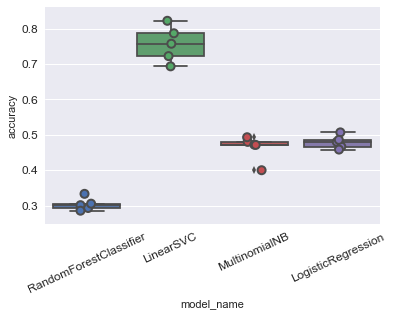

model_name
LinearSVC                 0.756257
LogisticRegression        0.479513
MultinomialNB             0.463360
RandomForestClassifier    0.303861
Name: accuracy, dtype: float64

In [13]:
#model selection!

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
plt.rc('xtick',labelsize = 12)
plt.rc('ytick',labelsize = 12)
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

plt.xticks( rotation='25')

plt.show()

cv_df.groupby('model_name').accuracy.mean()

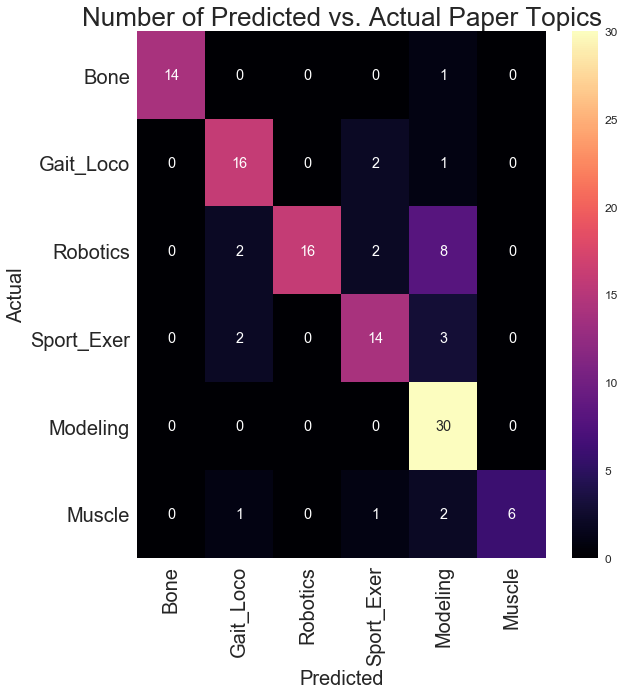

In [14]:
model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
plt.rc('xtick',labelsize = 20)
plt.rc('ytick',labelsize = 20)
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
fig.tight_layout(pad = 8)
sns.set(font_scale=1.2) #font size multiplier
sns.heatmap(conf_mat, annot=True, fmt='d', cmap = 'magma',
            xticklabels=topic_id_df.topic.values, yticklabels=topic_id_df.topic.values)

plt.ylabel('Actual',fontsize = 20)
plt.xlabel('Predicted',fontsize = 20)
plt.title('Number of Predicted vs. Actual Paper Topics', fontsize = 26)
plt.yticks( rotation='horizontal')

plt.savefig('biomchL_predict_plot.png')
plt.show()
#but what is confusing it?

In [143]:
from IPython.display import display

for predicted in topic_id_df.topic_id:
    for actual in topic_id_df.topic_id:
        if predicted != actual and conf_mat[actual, predicted] >= 2:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_topic[actual], id_to_topic[predicted], conf_mat[actual, predicted]))
            display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['topic', 'title']])
            print('')
            

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['topic'].unique()))

'Robotics' predicted as 'Gait_Loco' : 2 examples.


,topic,title
22,Robotics,Bipedal robotic walking control derived from a...
218,Robotics,Dynamic humanoid locomotion: a scalable formul...



'Sport_Exer' predicted as 'Gait_Loco' : 2 examples.


,topic,title
78,Sport_Exer,Who skips? using temperament to explain differ...
179,Sport_Exer,Comparison of daily physical activity paramete...



'Gait_Loco' predicted as 'Sport_Exer' : 2 examples.


,topic,title
200,Gait_Loco,Critical and sub-critical load-induced knee in...
150,Gait_Loco,Lower extremity power training improves healt...



'Robotics' predicted as 'Sport_Exer' : 2 examples.


,topic,title
206,Robotics,Predicting and optimizing microswimmer perform...
213,Robotics,Local force cues for strength and stability in...



'Robotics' predicted as 'Modeling' : 8 examples.


,topic,title
90,Robotics,Micro-ufo (untethered floating object): a high...
221,Robotics,Derivation of motion equation for mobile mani...
59,Robotics,Biomedical applications of soft robotics.
113,Robotics,Flow interactions of two- and three-dimensiona...
54,Robotics,A novel hardware-efficient cpg model based on ...
52,Robotics,A bio-hybrid dna rotor-stator nanoengine that ...
204,Robotics,Reconfigurable paramagnetic microswimmers: bro...
208,Robotics,Use the force: deformation correction in robot...



'Sport_Exer' predicted as 'Modeling' : 3 examples.


,topic,title
37,Sport_Exer,Kinetic demands of sprinting shift across the ...
65,Sport_Exer,Electromyographic and joint kinematic patterns...
74,Sport_Exer,A wearable sensor-based exercise biofeedback s...



'Muscle' predicted as 'Modeling' : 2 examples.


,topic,title
329,Muscle,"Proximal biceps long head: anatomy, biomechani..."
361,Muscle,Diaphragmatic dysfunction in sepsis due to sev...



             precision    recall  f1-score   support

       Bone       1.00      0.93      0.97        15
  Gait_Loco       0.76      0.84      0.80        19
   Robotics       1.00      0.57      0.73        28
 Sport_Exer       0.74      0.74      0.74        19
   Modeling       0.67      1.00      0.80        30
     Muscle       1.00      0.60      0.75        10

avg / total       0.84      0.79      0.79       121

